In [4]:
!pip install yfinance pandas numpy matplotlib

/var/folders/tt/7shc8ljs43bgk7xmv0nv1hqm0000gn/T/ipykernel_59144/2094029908.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("SPY", start="2015-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed
/var/folders/tt/7shc8ljs43bgk7xmv0nv1hqm0000gn/T/ipykernel_59144/2094029908.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["signal"][short_window:] = np.where(
/var/folders/tt/7shc8ljs43bgk7xmv0nv1hqm0000gn/T/ipykernel_59144/2094029908.py:29: RuntimeWarning: invalid value encountered in scalar divide
  sharpe_ratio = cagr / volatility


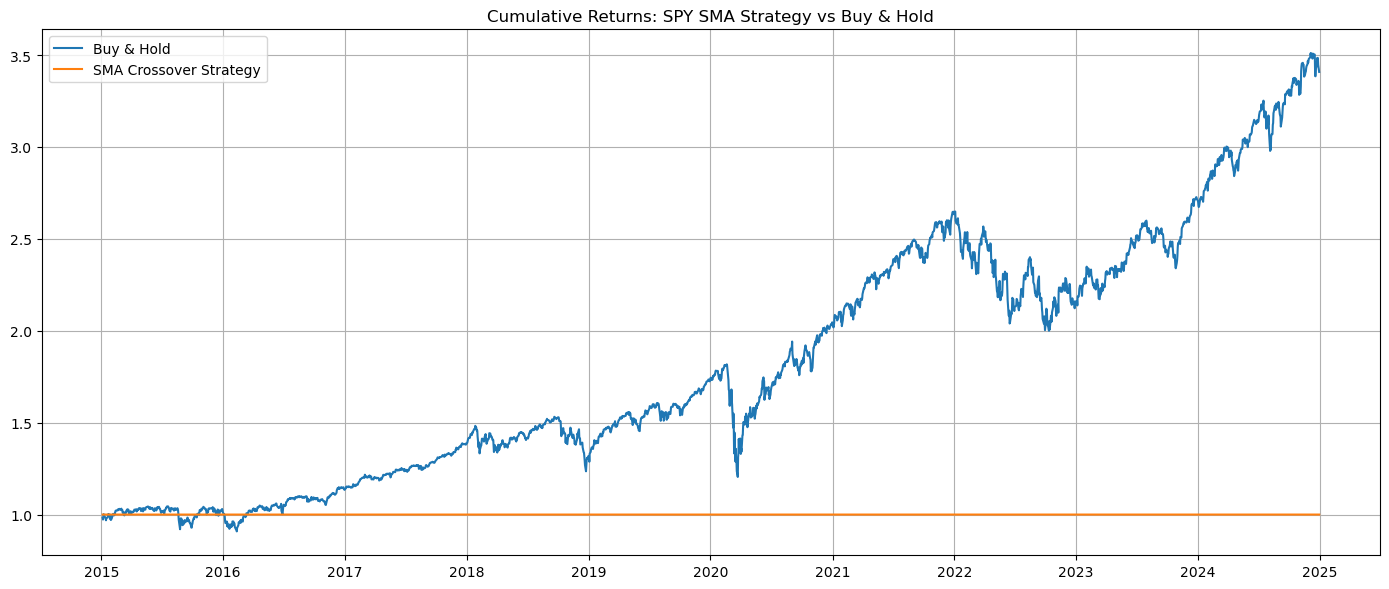

CAGR: 0.00%
Sharpe Ratio: nan
Max Drawdown: 0.00%


In [5]:
# Strategy: Moving Average Crossover

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Download historical data for SPY
data = yf.download("SPY", start="2015-01-01", end="2024-12-31")
data = data[["Close"]].rename(columns={"Close": "price"})
data["returns"] = data["price"].pct_change()

# Calculate moving averages
short_window = 50
long_window = 200
data["SMA50"] = data["price"].rolling(window=short_window).mean()
data["SMA200"] = data["price"].rolling(window=long_window).mean()

# Generate signals
data["signal"] = 0
data["signal"][short_window:] = np.where(
    data["SMA50"][short_window:] > data["SMA200"][short_window:], 1, 0
)
data["strategy"] = data["signal"].shift(1) * data["returns"]

# Calculate performance metrics
cagr = (data["strategy"] + 1).prod() ** (252 / len(data)) - 1
volatility = data["strategy"].std() * np.sqrt(252)
sharpe_ratio = cagr / volatility
max_drawdown = ((data["strategy"] + 1).cumprod().cummax() - (data["strategy"] + 1).cumprod()).max()

# Plot
plt.figure(figsize=(14, 6))
plt.plot((1 + data["returns"]).cumprod(), label="Buy & Hold")
plt.plot((1 + data["strategy"]).cumprod(), label="SMA Crossover Strategy")
plt.title("Cumulative Returns: SPY SMA Strategy vs Buy & Hold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print metrics
print(f"CAGR: {cagr:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")


